In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [ ]:
# import data
# input data
train_data = pd.read_csv("cc_train.csv")
df_train_set = train_data[["V1", "V2", "V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14",
                 "V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27",
                 "V28"]]

test_data = pd.read_csv("cc_test.csv")
df_test_set = test_data[["V1", "V2", "V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14",
                 "V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27",
                 "V28"]]

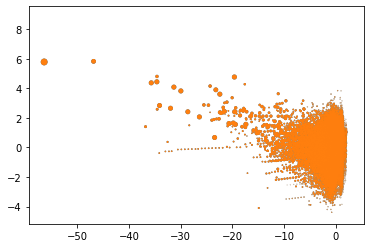

In [ ]:
# scatterplot of inputs data
plt.scatter(df_train_set["V1"], df_train_set["V15"], df_train_set["V28"])
plt.scatter(df_train_set["V1"], df_train_set["V15"], df_train_set["V28"])

df_train_set = df_train_set.iloc[1: , :]
df_test_set = df_train_set.iloc[1: , :]

#removing NaN values from the dataframe
df_train_set = df_train_set[np.isfinite(df_train_set).all(1)]

df_test_set = df_test_set[np.isfinite(df_test_set).all(1)]

In [ ]:
# create arrays
X_train = df_train_set.values
df_train_set = df_train_set.iloc[1: , :]
# df = df.reset_index()

X_test = df_test_set.values
df_test_set = df_test_set.iloc[1: , :]

In [ ]:
# instantiate train model
nbrs_train = NearestNeighbors(n_neighbors = 3) # fit model
nbrs_train.fit(X_train)

# instantiate test model
nbrs_test = NearestNeighbors(n_neighbors = 3) # fit model
nbrs_test.fit(X_test)

NearestNeighbors(n_neighbors=3)

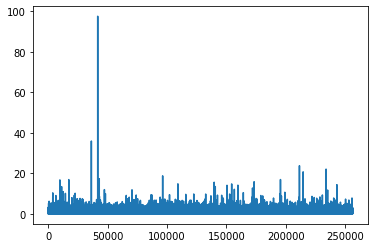

In [ ]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs_train.kneighbors(X_train)# plot mean of k-distances of each observation
plt.plot(distances.mean(axis = 1))



In [ ]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 0.15)
outlier_index

(array([     0,      1,      2, ..., 256317, 256320, 256321]),)

In [ ]:
# filter outlier values
outlier_values = df_train_set.iloc[outlier_index]
outlier_values

IndexError: ignored

In [ ]:
# plot data
plt.scatter(df["sepal_length"], df["sepal_width"], color = "b", s = 65)# plot outlier values
plt.scatter(outlier_values["sepal_length"], outlier_values["sepal_width"], color = "r")